In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets


# Loading Data

In [2]:
df = pd.read_csv('usArrests.csv')

df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Preprocessing

In [3]:
#check if there are nulls
df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
#check for duplicates

df.duplicated().sum()

0

### We don't need the City column for correlation and applying the PCA itself, however since we need this column to work with later when we do clustering we make a copy of our dataframe, then we use the column 'City' as an index for PCA and use the original dataframe for clustering

In [5]:
df_copy = df

In [6]:
df = df.set_index('City')

## there are no nulls or duplicates on our dataset. we initiate the first step of plotting our data to check for correlations

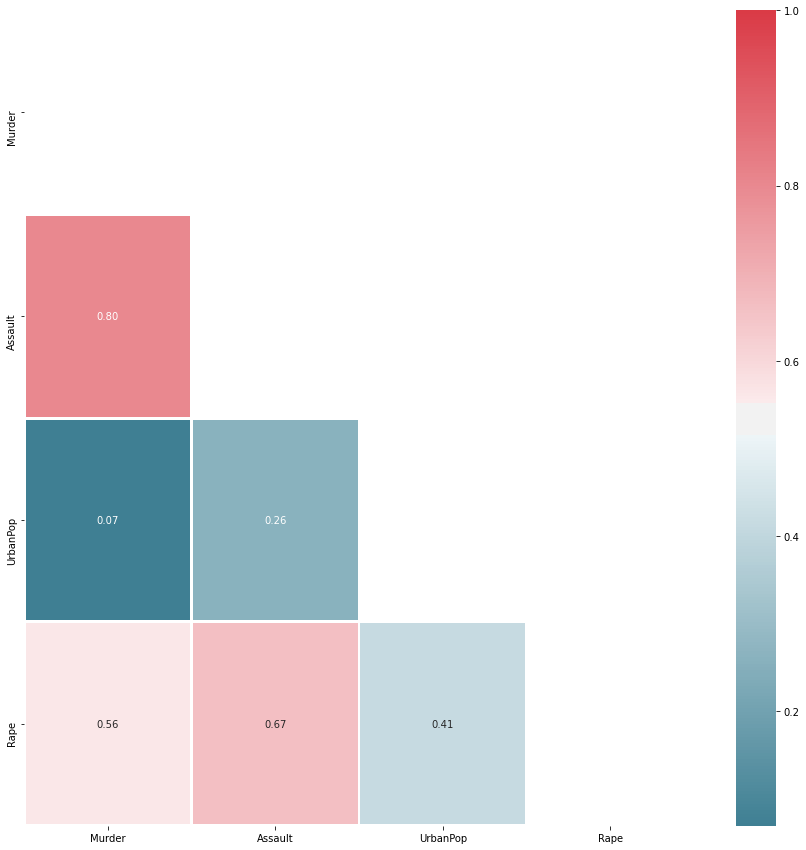

In [7]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(15, 15))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

# Apply PCA

In [8]:
# drop rows with missing values
df = df.dropna()

# select and standardize features
X = StandardScaler().fit_transform(df.values)

# choose number of components to be generated
nr_comps = 4
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

# This is to include the country code  as the rownames in the PC's
pca_df.head()

,0,1,2,3
City,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


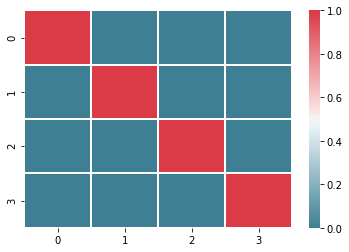

In [9]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

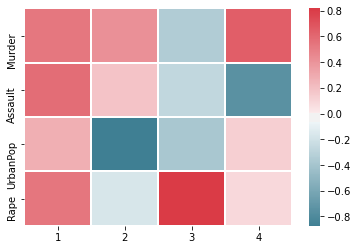

In [10]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()

#### IT IS CLEAR FROM THE ABOVE HEATMAP THAT THERE ARE MORE POSITIVE CORRELATION THAN THERE ARE NEGATIVE ONES. THIS IS EVIDENT IN COMP = 1 IT IS ALL POSITIVE


# Clustering the Data

In [11]:
data = df_copy.iloc[:,1:].values

In [12]:

scaler= StandardScaler()

scaled_data = scaler.fit_transform(data)



Text(0, 0.5, 'Euclidean distances')

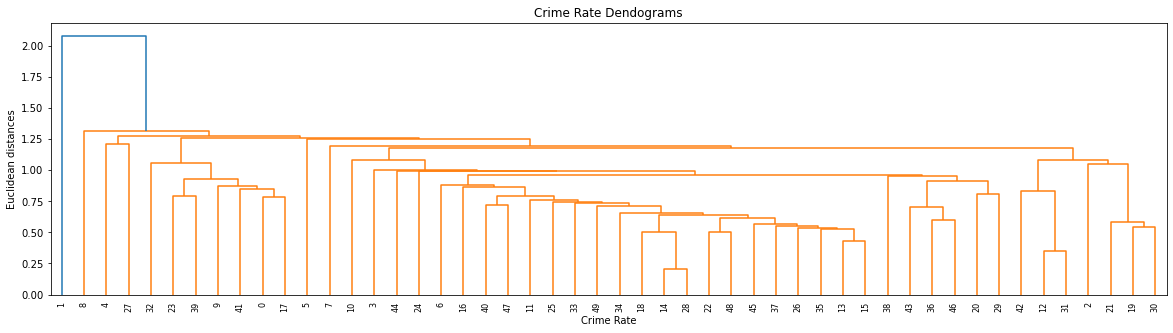

In [13]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = dendrogram(linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

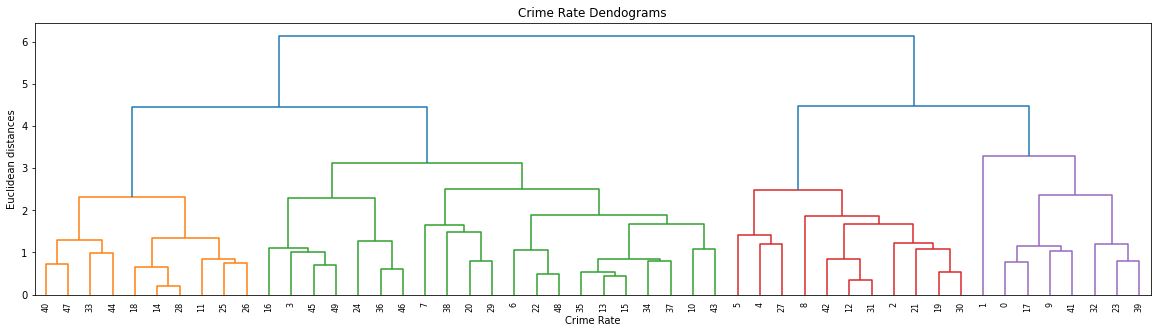

In [14]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = dendrogram(linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

In [15]:
#fir the agglomerative clustering

ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage='complete')

In [16]:
#fit and predict to have the cluster labels

y_pred = ac.fit_predict(data)
y_pred

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [17]:
df_copy['cluster labels'] = y_pred

In [18]:
#lets see which state falls in which cluster

df_copy[['City','cluster labels']]

,City,cluster labels
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


<AxesSubplot:xlabel='cluster labels', ylabel='Murder'>

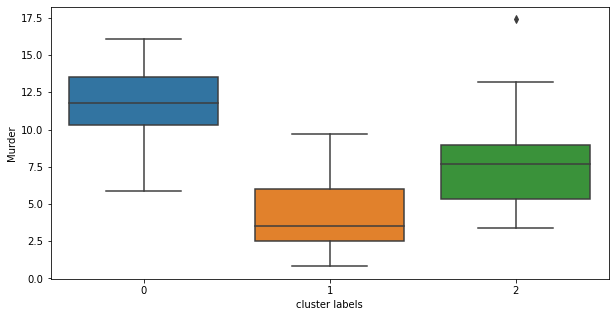

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Murder', data=df_copy)

<AxesSubplot:xlabel='cluster labels', ylabel='Rape'>

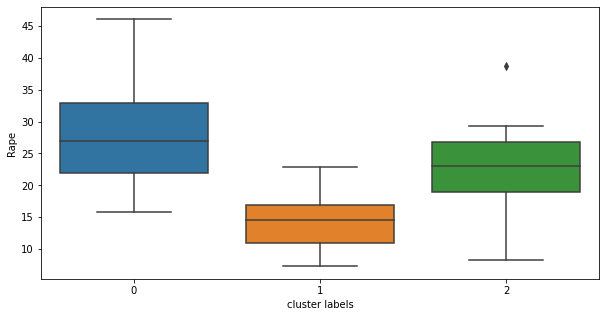

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=df_copy)

<AxesSubplot:xlabel='cluster labels', ylabel='Assault'>

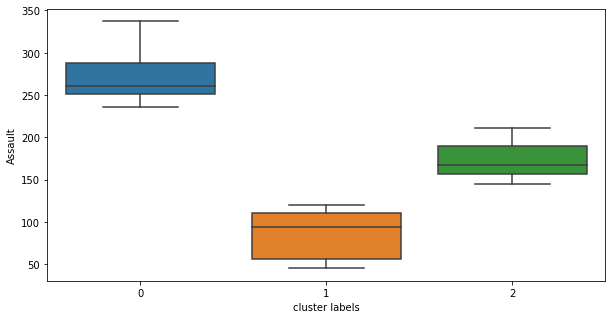

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Assault', data=df_copy)

# Observations:

* The Cities in the Cluster-1 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

* The Cities in Cluster-0 seems to have higher crime rates and can be regarded as Danger-Zone.

* The Cities in Cluster-2 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone

## Below we are able to see which city falls in which clusters

In [22]:
Safe_Zone= df_copy.groupby('cluster labels')['City'].unique()[0]
Safe_Zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [23]:
Danger_Zone= df_copy.groupby('cluster labels')['City'].unique()[1]
Danger_Zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [24]:
Moderate_Zone= df_copy.groupby('cluster labels')['City'].unique()[2]
Moderate_Zone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

### We create a visualization of the above categories

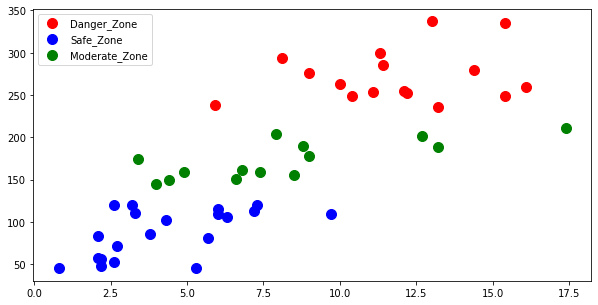

In [25]:


plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red', label ='Danger_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label ='Safe_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()

